## Digit Recognition Classification Model

* The purpose of this project is to build a classification model that can recognize digits as accurately as possible. The datasets used for this project are the sklearn's mnist and digits dataset.
The mnist database contains a total of 70000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9.


In [1]:
#importing dependencies here
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits 
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

## 1. MNIST dataset

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
data, target = mnist["data"], mnist["target"]

In [4]:
data.shape

(70000, 784)

In [5]:
target.shape

(70000,)

In [6]:
target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

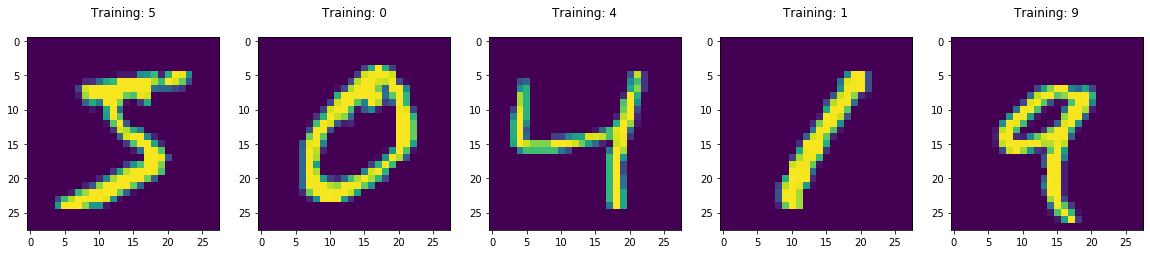

In [7]:
# displaying images and corresponding labels from the digits dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)))
    plt.title("Training: %s\n" %label)

### Splitting the data into training and test data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)

In [10]:
len(X_train)

49000

In [11]:
len(X_test)

21000

### Applying Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver="newton-cg", multi_class="multinomial")
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lm.fit(X_train, y_train)

C:\Users\eshom\.virtualenvs\digit_recognition_classification_model-h40RarnV\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation

In [14]:
lm.score(X_test, y_test)

0.9124761904761904

In [15]:
predictions = lm.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Truth')

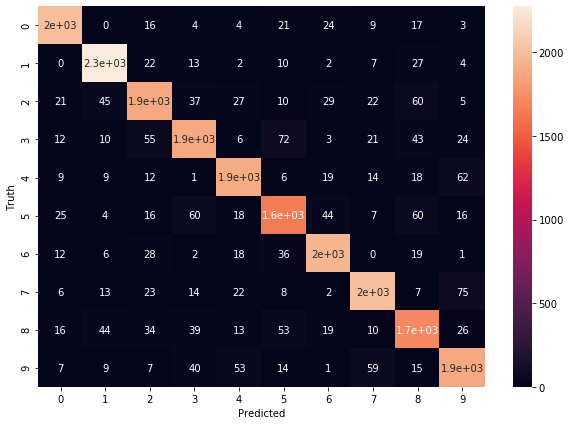

In [18]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2099
           1       0.94      0.96      0.95      2362
           2       0.90      0.88      0.89      2144
           3       0.90      0.88      0.89      2137
           4       0.92      0.93      0.92      2050
           5       0.88      0.87      0.87      1895
           6       0.93      0.94      0.94      2078
           7       0.93      0.92      0.93      2179
           8       0.87      0.87      0.87      1969
           9       0.90      0.90      0.90      2087

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



### Findings for MNIST dataset with Logistic Regression

The logistic regression model with newton-cg solver did a good job in classifying the digits in the MNIST dataset keeping in mind the large size of dataset with 70000 records. The confusion matrix shows some small number of mispredictions but the ratio of predicted to actual is 96%.
<br>

## 2. Sklearn Digits Dataset

In [20]:
# reading the digits dataset from sklearn
digits = load_digits()

In [21]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [22]:
digits.data.shape

(1797, 64)

In [23]:
# labels corresponding to the images
digits.target.shape

(1797,)

In [24]:
# digits.images

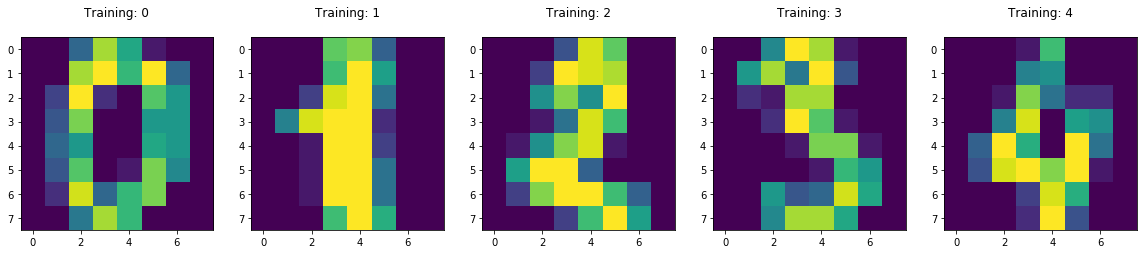

In [25]:
# displaying images and corresponding labels from the digits dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)))
    plt.title("Training: %i\n" %label)

### Splitting the data into training and test data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [28]:
len(X_train)

1257

In [29]:
len(X_test)

540

### Implementing Logistics Regression for Digits Dataset

In [30]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver="newton-cg", max_iter=1000)
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation

In [32]:
lm.score(X_test, y_test)

0.9555555555555556

In [33]:
predictions = lm.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Truth')

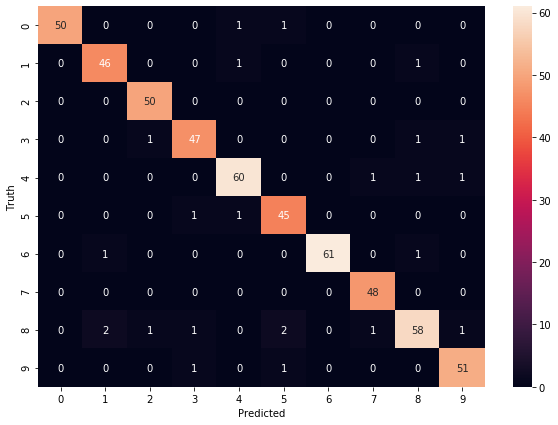

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.94      0.96      0.95        48
           2       0.96      1.00      0.98        50
           3       0.94      0.94      0.94        50
           4       0.95      0.95      0.95        63
           5       0.92      0.96      0.94        47
           6       1.00      0.97      0.98        63
           7       0.96      1.00      0.98        48
           8       0.94      0.88      0.91        66
           9       0.94      0.96      0.95        53

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



### Findings for Digits dataset with Logistic Regression
The logistic regression model did a pretty good job in classifying the digits in the Digits dataset. The confusion matrix shows only a small number of mispredictions, the ratio of predicted to actual is 96%.